In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd


In [7]:
housevalue = fch ()

In [57]:
x=pd.DataFrame(housevalue.data,columns=housevalue.feature_names)
y=pd.DataFrame(housevalue.target,columns=housevalue.target_names)
housevalue_df= pd.concat([x,y],axis=1)

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
for i in [x_train,x_test]:
    i.index = range(i.shape[0])
clf = LinearRegression(normalize= True)# normalize x 
clf.fit(x_train,y_train)
yhat = clf.predict(x_test)
[*zip(x_train.columns,coef)]

[('MedInc', 0.42635589084954706),
 ('HouseAge', 0.00891863569853775),
 ('AveRooms', -0.09611467694165059),
 ('AveBedrms', 0.5858528833653095),
 ('Population', -4.011961108560289e-06),
 ('AveOccup', -0.0032256161238957484),
 ('Latitude', -0.43276137477205995),
 ('Longitude', -0.4459587488601602)]

In [137]:
#linear regression metrics
"""
MSE: mean squared error

- from sklearn.metrics import mean_squared_error
- from sklearn.model_selection import cross_val_score(scoring="mean_squared_error")

r2 : 
- from sklearn.metrics import r2_score
- linearregression.score(x,y)
- from sklearn.model_selection import cross_val_score(scoring="r2")
"""
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
# be aware of sequence
r2_score(y_test,yhat)
cross_val_score(clf,x,y,cv=10,scoring = "neg_mean_absolute_error")*(-1)
#MSE(yhat,y_test)
#y_test.mean()

array([0.5351668 , 0.52910504, 0.67851477, 0.47485745, 0.65197842,
       0.50092187, 0.39629861, 0.64006268, 0.60286176, 0.435447  ])

In [138]:
import matplotlib.pyplot as plt

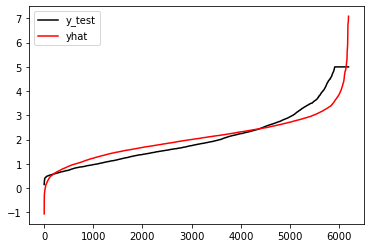

In [132]:
plt.plot(range(len(y_test)),sorted(y_test.values),c="black",label= "y_test")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label="yhat")
plt.legend()
plt.show()

In [136]:
# r2 may be smaller than zero, meaning (yhat -y_test) is greater than (y_mean- y_test).
# not good fit as y_mean is better than yhat. check your preprocessing

In [140]:
# linear regression limitations:https://blog.csdn.net/Noob_daniel/article/details/76087829
# difference between  ols and gradient descent : https://blog.csdn.net/GhostintheCode/article/details/84977703
# multicollinearity
